In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
Univ = pd.read_csv("C:/Users/Pranit/Desktop/pythonscripts/datasets/Universities.csv")

In [3]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return x

In [4]:
#normalized dataframe considering the numerical part of data

df_norm = norm_func(Univ.iloc[:,1:])

In [5]:
from scipy.cluster.hierarchy import linkage

In [6]:
import scipy.cluster.hierarchy as sch

In [7]:
type(df_norm)

pandas.core.frame.DataFrame

In [8]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [9]:
z = linkage(df_norm, method="complete", metric = "euclidean")

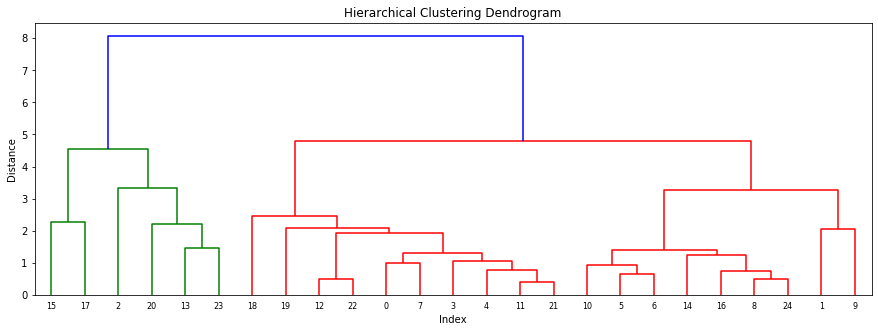

In [10]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [11]:
#help(linkage)

# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(df_norm) 


cluster_labels=pd.Series(h_complete.labels_)

Univ['clust']=cluster_labels # creating a  new column and assigning it to new column 
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()


,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [12]:
Univ.iloc[:,2:].groupby(Univ.clust).median()

# creating a csv file 
Univ.to_csv("University.csv",encoding="utf-8")

In [13]:
#

In [14]:
import numpy as np
import pandas as pd

import scipy #for dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [15]:
np.set_printoptions(precision = 4, suppress = True)
plt.figure(figsize = (10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [16]:
cars = pd.read_csv('mtcars.csv')
cars.head()
cars.columns = ['car_names', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
X = cars.ix[:,(1,3,4,6)].values
y = cars.ix[:,(9)].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


# using scipy to generate dendrograms

In [17]:
Z= linkage(X, 'ward')

ValueError: The condensed distance matrix must contain only finite values.

# sentdex

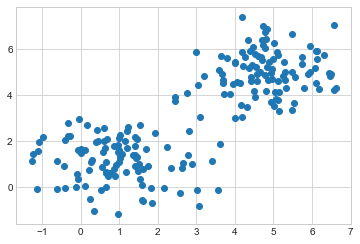

TypeError: fit() missing 1 required positional argument: 'X'

In [24]:
import numpy as np
from sklearn.cluster import MeanShift as ms
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

centers = [[1,1], [5,5]]

X, _ = make_blobs(n_samples = 200, centers = centers, cluster_std = 1)

plt.scatter(X[:,0], X[:,1])
plt.show()

ms.fit(X)
labels = ms.labels_ 
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: ", n_clusters)

colors = 10*['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']

print(colors)
print(labels)

for i in range(len(X)):
              plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
        
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
           marker = "x", s = 150, linewidths = 5, zorder = 10)

plt.show()

# kindson tech pro

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [26]:
#create a blob of 200 data points
dataset = make_blobs(n_samples = 200,
                    n_features = 2,
                    centers = 4,
                    cluster_std = 1.6,
                    random_state = 50)

In [28]:
points = dataset[0]

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

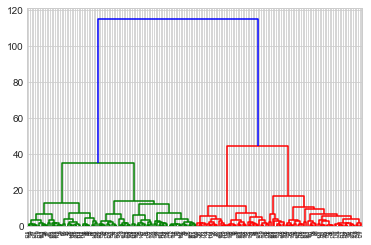

In [30]:
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

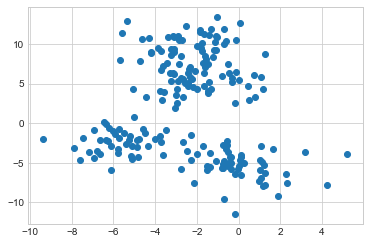

In [31]:
 plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [34]:
#performing actual clustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [35]:
y_hc = hc.fit_predict(points)

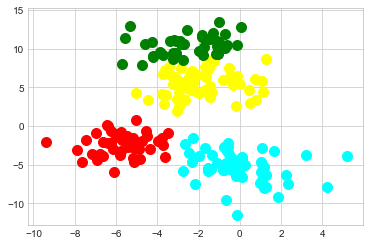

In [39]:
plt.scatter(points[y_hc == 0,0], points[y_hc == 0,1], s = 100, c = 'cyan')
plt.scatter(points[y_hc == 1,0], points[y_hc == 1,1], s = 100, c = 'yellow')
plt.scatter(points[y_hc == 2,0], points[y_hc == 2,1], s = 100, c = 'red')
plt.scatter(points[y_hc == 3,0], points[y_hc == 3,1], s = 100, c = 'green')